In [146]:
# paquete necesario para leer archivos de github
#!pip install requests
#!pip install duckdb
#!pip install matplotlib
#!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/3a/98/3041681b3a0fef0f59033861a05d846aa1d284b07b531ce35b1b97cc2e93/scipy-1.11.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 162.5 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 291.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.1 MB 3.9 MB/s eta 0:00:12
    --------------------------------------- 0.6/44.1 MB 6.8 MB/s eta 0:00:07
   - -------------------------------------- 1.8/44.1 MB 10.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/44.1 MB 13.4 MB/s eta 0:00:04
   --- -----------------------

In [1]:
import pandas as pd
import requests as rq
import networkx as nx
import pyvis as pv
import sys
import numpy as np
import os
import duckdb
con = duckdb.connect(database=':memory:')
import re # para extraer caracteres que cumplan con una condición en específico
#from io import StringIO
import itertools # análogo a rep en R
import matplotlib.pyplot as plt
import pickle
import copy
import random
import warnings

%matplotlib inline

In [2]:
txt = "C:/Users/ASUS/OneDrive/Documentos/Tesis/Analisis-de-redes-de-la-revista-estadistica-Colombiana/TXT"
# se realiza un listado de las decadas disponibles
decadas = os.listdir(txt)
decadas

['2000', '2010', '2020', '60s', '70s', '80s', '90s']

In [3]:
# se crea una lista que contiene una lista por cada década, mostrando las publicaciones que se hicieron en cada década
public = []
# se crea una lista que contiene una lista por cada década, y dentro de cada una de estas se encuentra una lista por publicación en esa década, la cual 
# contiene los nombres de los archivos que contienen
autores_art = []
gen_aut = []
papers = []
pattern = re.compile(r'\((.*?)\)')
for i in range(len(decadas[3:7])):
    papers.append([])
    autores_art.append([])
    gen_aut.append([])
    txt1 = txt+"/"+decadas[3:7][i]
    publ = os.listdir(txt1)
    public.append(publ)
    for j in range(len(publ)):
        papers[i].append([]) # se crea una lista vacia para cada publicación
        autores_art[i].append([])
        gen_aut[i].append([])
        txt2 = txt1+"/"+publ[j]
        art = os.listdir(txt2) # listado de archivos en la respectiva publicación
        for k in range(len(art)):
            # separar nombres de autores
            public_split = art[k].split('_',2)
            aut = public_split[0].split(',')
            gen_aut[i][j].append(pattern.findall(public_split[0]))
            autores_art[i][j].append([nombre.replace("(M)","").replace("(F)","") for nombre in aut])

            # separar cada línea del txt en un elemento de una lista
            art_txt = open(txt2+"/"+art[k], 'r', encoding='utf-8', errors='replace').readlines()
            art_txt = [linea.strip() for linea in art_txt]
            papers[i][j].append(art_txt)     

In [5]:
def which_ref(lista):
    for i, x in enumerate(lista):
        if str.title(str.lower(x)) in ['Referencias','Bibliografía','Bibliografia','References','Bibliography','Referências']:
            return i  # Retorna la posición del primer elemento que cumple la condición
    return 'No se encontró'

autores_ref = []
titulo_ref = []
año_ref = []
titulo_art = []
for dec in papers:
    autores_ref.append([])
    titulo_ref.append([])
    titulo_art.append([])
    año_ref.append([])
    for pub in dec:
        autores_ref[papers.index(dec)].append([])
        titulo_ref[papers.index(dec)].append([])
        titulo_art[papers.index(dec)].append([])
        año_ref[papers.index(dec)].append([])
        for art in pub:
            titulo_art[papers.index(dec)][dec.index(pub)].append(str.title(str.lower(art[0])))
            
            pos_ref = which_ref(art)
            autores_ref[papers.index(dec)][dec.index(pub)].append([])
            titulo_ref[papers.index(dec)][dec.index(pub)].append([])
            año_ref[papers.index(dec)][dec.index(pub)].append([])
            if pos_ref=='No se encontró':
                print([papers.index(dec),dec.index(pub),pub.index(art)])
            else:
                print([papers.index(dec),dec.index(pub),pub.index(art)])
                for ref in art[pos_ref+1:]:
                    part = ref.split('.')
                    autores_ref[papers.index(dec)][dec.index(pub)][pub.index(art)].append(part[0].split(','))
                    titulo_ref[papers.index(dec)][dec.index(pub)][pub.index(art)].append(str.title(str.lower(part[1])))
                    #año_ref[papers.index(dec)][dec.index(pub)][pub.index(art)].append(part[2].strip('(').strip(')'))

[0, 0, 0]
[0, 0, 1]
[0, 1, 0]
[1, 0, 0]
[1, 0, 1]
[1, 0, 2]
[1, 0, 3]
[2, 0, 0]
[2, 0, 1]
[2, 0, 2]
[2, 0, 3]
[2, 0, 4]
[2, 0, 5]
[2, 0, 6]
[2, 1, 0]
[2, 1, 1]
[2, 1, 2]
[2, 1, 3]
[2, 1, 4]
[2, 1, 5]
[2, 1, 6]
[2, 2, 0]
[2, 2, 1]
[2, 2, 2]
[2, 2, 3]
[2, 2, 4]
[2, 2, 5]
[2, 3, 0]
[2, 3, 1]
[2, 3, 2]
[2, 3, 3]
[2, 3, 4]
[2, 3, 5]
[2, 4, 0]
[2, 4, 1]
[2, 4, 2]
[2, 4, 3]
[2, 4, 4]
[2, 4, 5]
[2, 4, 6]
[2, 4, 7]
[2, 4, 8]
[2, 4, 9]
[2, 4, 10]
[2, 4, 11]
[2, 4, 12]
[2, 4, 13]
[2, 4, 14]
[2, 4, 15]
[2, 4, 16]
[2, 4, 17]
[2, 4, 18]
[2, 4, 19]
[2, 5, 0]
[2, 5, 1]
[2, 5, 2]
[2, 5, 3]
[2, 5, 4]
[2, 6, 0]
[2, 6, 1]
[2, 6, 2]
[2, 6, 3]
[2, 6, 4]
[2, 6, 5]
[2, 6, 6]
[2, 7, 0]
[2, 7, 1]
[2, 7, 2]
[2, 7, 3]
[2, 7, 4]
[2, 7, 5]
[2, 8, 0]
[2, 8, 1]
[2, 9, 0]
[2, 9, 1]
[2, 9, 2]
[2, 10, 0]
[2, 10, 1]
[2, 10, 2]
[2, 11, 0]
[2, 11, 1]
[2, 11, 2]
[2, 12, 0]
[2, 12, 1]
[2, 12, 2]
[2, 13, 0]
[2, 13, 1]
[2, 14, 0]
[2, 14, 1]
[2, 14, 2]
[2, 14, 3]
[2, 14, 4]
[2, 15, 0]
[2, 15, 1]
[2, 15, 2]
[2, 15, 3]
[2, 15, 4]

In [6]:
# Función para aplanar listas 
def flatten_list(nested_list):
    flat_list = []
    for element in nested_list:
        if isinstance(element, list):
            flat_list.extend(flatten_list(element))
        else:
            flat_list.append(element)
    return flat_list

In [7]:
Info = pd.DataFrame(columns=['Autor_Art','Autor_Ref','Gen_Autor_Art','Titulo_Art','Titulo_Ref','Decada'])

decadas = decadas[3:7]

for dec in autores_art:
    i = autores_art.index(dec)
    for sem in dec:
        j = dec.index(sem)
        for art in sem:
            k = sem.index(art)
            num_ref = len(autores_ref[i][j][k])
            for aut in art:
                w = art.index(aut)
                for x in range(num_ref):
                    num_aut_ref = len(autores_ref[i][j][k][x])
                    new_ref = pd.DataFrame({'Autor_Art':list(itertools.repeat(autores_art[i][j][k][w], times=num_aut_ref)),
                                            'Autor_Ref':autores_ref[i][j][k][x],
                                            'Gen_Autor_Art':list(itertools.repeat(gen_aut[i][j][k][w], times=num_aut_ref)),
                                            'Titulo_Art':list(itertools.repeat(titulo_art[i][j][k], times=num_aut_ref)),
                                            'Titulo_Ref':list(itertools.repeat(titulo_ref[i][j][k][x], times=num_aut_ref)),
                                            'Decada':list(itertools.repeat(decadas[i], times=num_aut_ref))})
                    Info = pd.concat([Info,new_ref], ignore_index=True)

In [8]:
Info

Autor_Art                Autor_Ref Gen_Autor_Art  \
0         L Thorin Casas            L H C Tippett             M   
1         L Thorin Casas                   A Anos             M   
2         L Thorin Casas           Diaz de Arcaya             M   
3         L Thorin Casas             Lucien March             M   
4         L Thorin Casas  Leo Duge de Bernonville             M   
...                  ...                      ...           ...   
2556  J C Correa Morales                 Ozturk A             M   
2557  J C Correa Morales              Small N J H             M   
2558  J C Correa Morales           Srivastava M S             M   
2559  J C Correa Morales                  Yáñez S             M   
2560  J C Correa Morales               Correa J C             M   

                                             Titulo_Art  \
0     La Estadística Elemental Como Parte De La Educ...   
1     La Estadística Elemental Como Parte De La Educ...   
2     La Estadística Elemental Como Parte De La Educ...   
3     La Estadística Elemental Como Parte De La Educ...   
4     La Estadística Elemental Como Parte De La Educ...   
...                                                 ...   
2556  Una Revisión De Medidas Multivariadas De Asime...   
2557  Una Revisión De Medidas Multivariadas De Asime...   
2558  Una Revisión De Medidas Multivariadas De Asime...   
2559  Una Revisión De Medidas Multivariadas De Asime...   
2560  Una Revisión De Medidas Multivariadas De Asime...   

                                             Titulo_Ref Decada  
0                                           Estadística    60s  
1                                           Estadística    60s  
2                                           Estadística    60s  
3                Les Principles Del Methode Statistique    60s  
4                    Iniciatian A L'Analyse Statistique    60s  
...                                                 ...    ...  
2556  A Comparative Study Of Goodness Of Fit Teats F...    90s  
2557  Marginal Skewness And Kurtosis In Testing Mult...    90s  
2558  A Measure Of Skewness And Kurtosis And A Graph...    90s  
2559  Reporte Técnico: Estudio De Potencia Des Estad...    90s  
2560  Reporte Técnico: Estudio De Potencia Des Estad...    90s  

[2561 rows x 6 columns]

In [36]:
Info[Info['Autor_Art'].isin(['A Muñoz','A Velasco Muñoz'])]

Autor_Art                                          Autor_Ref  \
9    A Velasco Muñoz                                       Graybill F A   
10   A Velasco Muñoz                                         Searle S R   
382          A Muñoz                                           Armitage   
383          A Muñoz                                                  P   
384          A Muñoz                                               Hill   
385          A Muñoz                                                  A   
386          A Muñoz  International Mathematical and Statistical Lib...   
387          A Muñoz                                               Kass   
388          A Muñoz                                                  E   
389          A Muñoz                                           Snedecor   
390          A Muñoz                                                  G   
391          A Muñoz                                 Chaning Laboratory   
392          A Muñoz   Department of Preventive Medicine and Clinica...   
393          A Muñoz   Harvard Medical School and Peter Bent Brigham...   
394          A Muñoz  Department of Epidemiology and Department of B...   
395          A Muñoz                                       MD 21205 USA   
750  A Velasco Muñoz                                               DANE   
751  A Velasco Muñoz                                               DANE   
752  A Velasco Muñoz                                               DANE   
753  A Velasco Muñoz                                             Lora E   
754  A Velasco Muñoz                                          Moncada J   
755  A Velasco Muñoz                                         Siabatto C   
756  A Velasco Muñoz                                          Correal D   
757  A Velasco Muñoz                                           Olarte L   
758  A Velasco Muñoz                                        Rodríguez M   
759  A Velasco Muñoz             Organización Internacional del Trabajo   
760  A Velasco Muñoz                                          Siabato C   
761  A Velasco Muñoz                                       Makridakis S   
762  A Velasco Muñoz                                         Wheelwrigh   

    Gen_Autor_Art                                         Titulo_Art  \
9               M                              La Inversa De Penrose   
10              M                              La Inversa De Penrose   
382             M  The Use Of Pilot Study Data In The Estimation ...   
383             M  The Use Of Pilot Study Data In The Estimation ...   
384             M  The Use Of Pilot Study Data In The Estimation ...   
385             M  The Use Of Pilot Study Data In The Estimation ...   
386             M  The Use Of Pilot Study Data In The Estimation ...   
387             M  The Use Of Pilot Study Data In The Estimation ...   
388             M  The Use Of Pilot Study Data In The Estimation ...   
389             M  The Use Of Pilot Study Data In The Estimation ...   
390             M  The Use Of Pilot Study Data In The Estimation ...   
391             M  The Use Of Pilot Study Data In The Estimation ...   
392             M  The Use Of Pilot Study Data In The Estimation ...   
393             M  The Use Of Pilot Study Data In The Estimation ...   
394             M  The Use Of Pilot Study Data In The Estimation ...   
395             M  The Use Of Pilot Study Data In The Estimation ...   
750             M            Comparación Entre El Ipc-40 Y El Ipc-60   
751             M            Comparación Entre El Ipc-40 Y El Ipc-60   
752             M            Comparación Entre El Ipc-40 Y El Ipc-60   
753             M            Comparación Entre El Ipc-40 Y El Ipc-60   
754             M            Comparación Entre El Ipc-40 Y El Ipc-60   
755             M            Comparación Entre El Ipc-40 Y El Ipc-60   
756             M            Comparación Entre El Ipc-40 Y El Ipc-60   
757             M            Com

In [136]:
Rel_Aut = con.execute("""select   case when Autor_Ref is in ('Fandiño R','Fandiño A') then 'Fandiño A R'
                                       when Autor_Ref == 'Blanco B' then 'Blanco B J A'
                                       when Autor_Ref == 'Granados D' then 'A Granados Diaz'
                                       else Autor_Ref end as Autor_Ref, 
                                  Gen_Autor_Art, Decada, count(*) as Num_Ref,
                                  case when Autor_Art == 'J A Vargas N'  then 'Vargas J A'
                                       when Autor_Art == 'D Ospina Botero' then 'Ospina D'
                                       when Autor_Art == ' A Granados Diaz' then 'A Granados Diaz'
                                       when Autor_Art == 'F Cepeda C' then 'Cepeda C F'
                                       when Autor_Art == 'L Bautista' then 'Bautista L'
                                       when Autor_Art == 'M Fidel Castillo' then 'Castillo M F'
                                       when Autor_Art == 'H Sahai' then 'Sahai H'
                                       when Autor_Art == 'M F Castillo' then 'Castillo M F'
                                       when Autor_Art == 'B Chaves Cordoba' then 'B Chavez Cordoba'
                                       when Autor_Art is in ('R Fandiño','R E Fandiño A') then 'Fandiño A R'
                                       when Autor_Art is in ('J A Blanco B','J A Blanco Barros') then 'Blanco B J A'
                                       when Autor_Art is in ('J A Corzo S','J Corzo S') then 'Corzo J'
                                       when Autor_Art is in ('P N Pacheco','P N Pacheco O','P N Pacheco Duran') then 'P N Pacheco D'
                                       when Autor_Art is in ('L A Lopez Perez','L A Lopez') then 'L A Lopez P'
                                       when Autor_Art is in ('L A Lopez Perez','L A Lopez') then 'L A Lopez P'
                                       else Autor_Art end as Autor_Art ,
                                  case when Titulo_Ref == 'Una Prueba De Dispersión Basada En Secuencias' then 'Pruebas De Hipótesis Sobre Parámetros De Localización Y Dispersión Basadas En Secuencias'
                                       else Titulo_Ref end as Titulo_Ref
                         from     Info
                         group by Autor_Art, Autor_Ref, Gen_Autor_Art, Decada""").df()
Rel_Aut[Rel_Aut['Decada']=='60s']

Autor_Ref Gen_Autor_Art Decada  Num_Ref       Autor_Art
0                     C BERGE             M    60s        1        J Charum
1                       B ROY             M    60s        1        J Charum
559             L H C Tippett             M    60s        1  L Thorin Casas
1104           Diaz de Arcaya             M    60s        1  L Thorin Casas
1105             Lucien March             M    60s        1  L Thorin Casas
1106                      ORE             M    60s        1        J Charum
1107                                      M    60s        1        J Charum
1660                   A Anos             M    60s        1  L Thorin Casas
1661  Leo Duge de Bernonville             M    60s        1  L Thorin Casas

In [130]:
Rel_Aut['Num_Ref'].max()

8

In [137]:
G_60 = nx.DiGraph()
G_70 = nx.DiGraph()
G_80 = nx.DiGraph()
G_90 = nx.DiGraph()

for index, row in Rel_Aut[Rel_Aut['Decada']=='60s'].iterrows():
    G_60.add_edge(row['Autor_Art'], row['Autor_Ref'], weight=row['Num_Ref'])

for index, row in Rel_Aut[Rel_Aut['Decada']=='70s'].iterrows():
    G_70.add_edge(row['Autor_Art'], row['Autor_Ref'], weight=row['Num_Ref'])

for index, row in Rel_Aut[Rel_Aut['Decada']=='80s'].iterrows():
    G_80.add_edge(row['Autor_Art'], row['Autor_Ref'], weight=row['Num_Ref'])

for index, row in Rel_Aut[Rel_Aut['Decada']=='90s'].iterrows():
    G_90.add_edge(row['Autor_Art'], row['Autor_Ref'], weight=row['Num_Ref'])

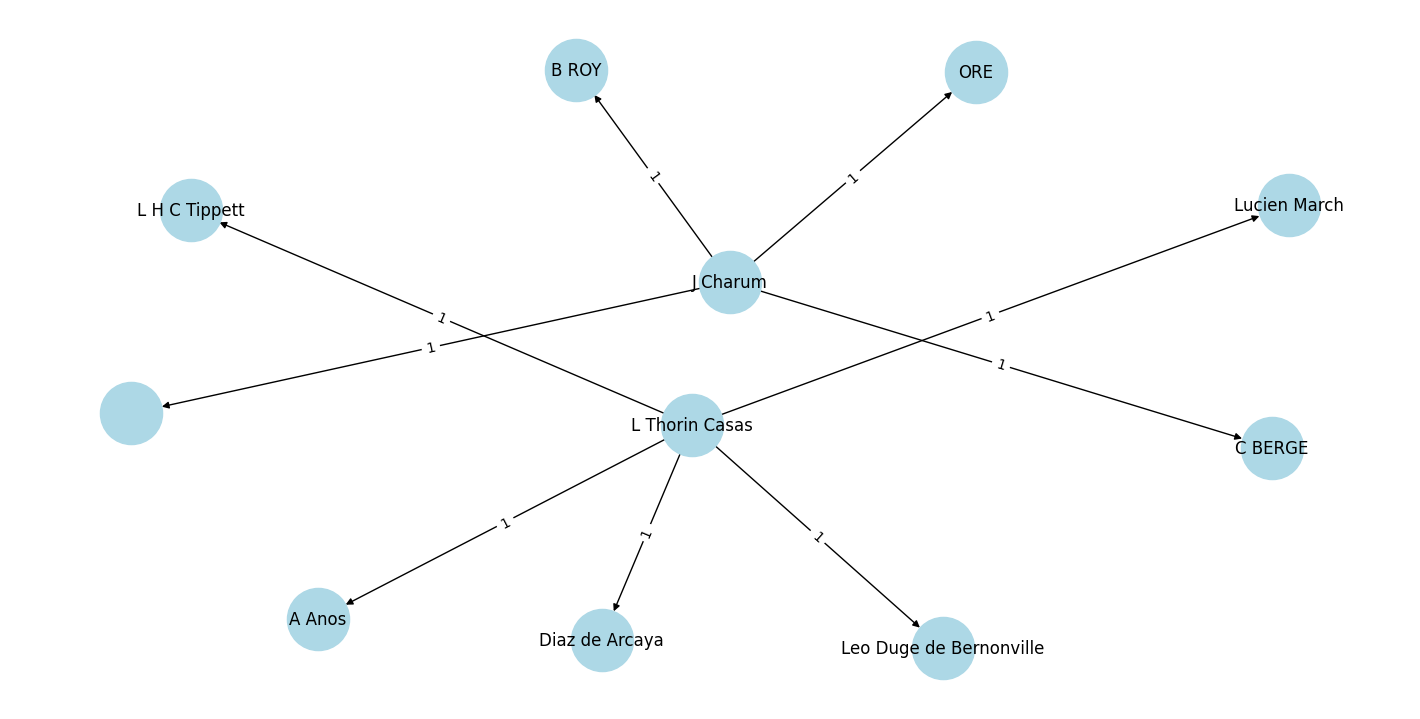

In [143]:
plt.figure(figsize=(14,7))

# Dibujar el grafo
pos = nx.spring_layout(G_60)
nx.draw(G_60, pos, with_labels=True, node_color='lightblue', node_size=2000)
labels = nx.get_edge_attributes(G_60, 'weight')
nx.draw_networkx_edge_labels(G_60, pos, edge_labels=labels)

# Mostrar el grafo
plt.show()

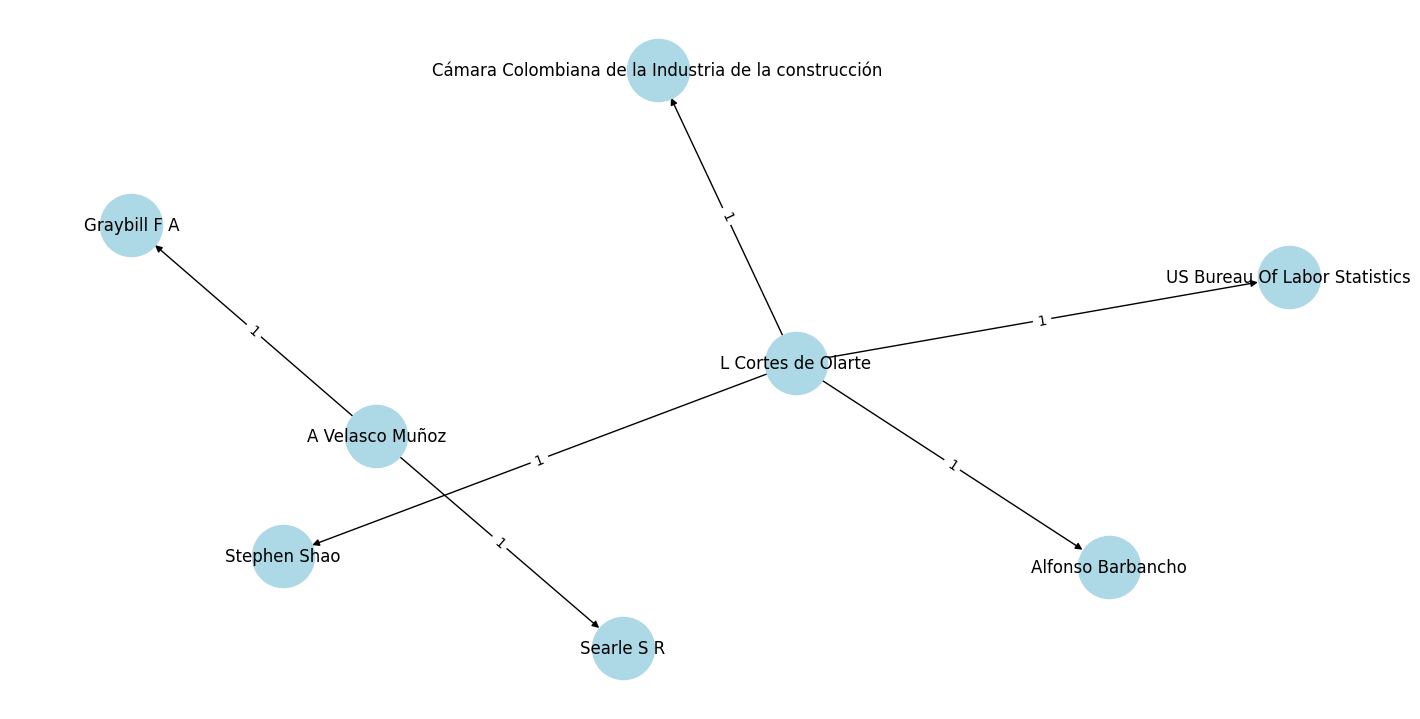

In [142]:
plt.figure(figsize=(14,7))

# Dibujar el grafo
pos = nx.spring_layout(G_70)
nx.draw(G_70, pos, with_labels=True, node_color='lightblue', node_size=2000)
labels = nx.get_edge_attributes(G_70, 'weight')
nx.draw_networkx_edge_labels(G_70, pos, edge_labels=labels)

# Mostrar el grafo
plt.show()

## plt.figure(figsize=(30,20))

# Dibujar el grafo
pos = nx.spring_layout(G_80)
nx.draw(G_80, pos, with_labels=True, node_color='lightblue', node_size=200)
labels = nx.get_edge_attributes(G_80, 'weight')
nx.draw_networkx_edge_labels(G_80, pos, edge_labels=labels)

# Mostrar el grafo
plt.show()

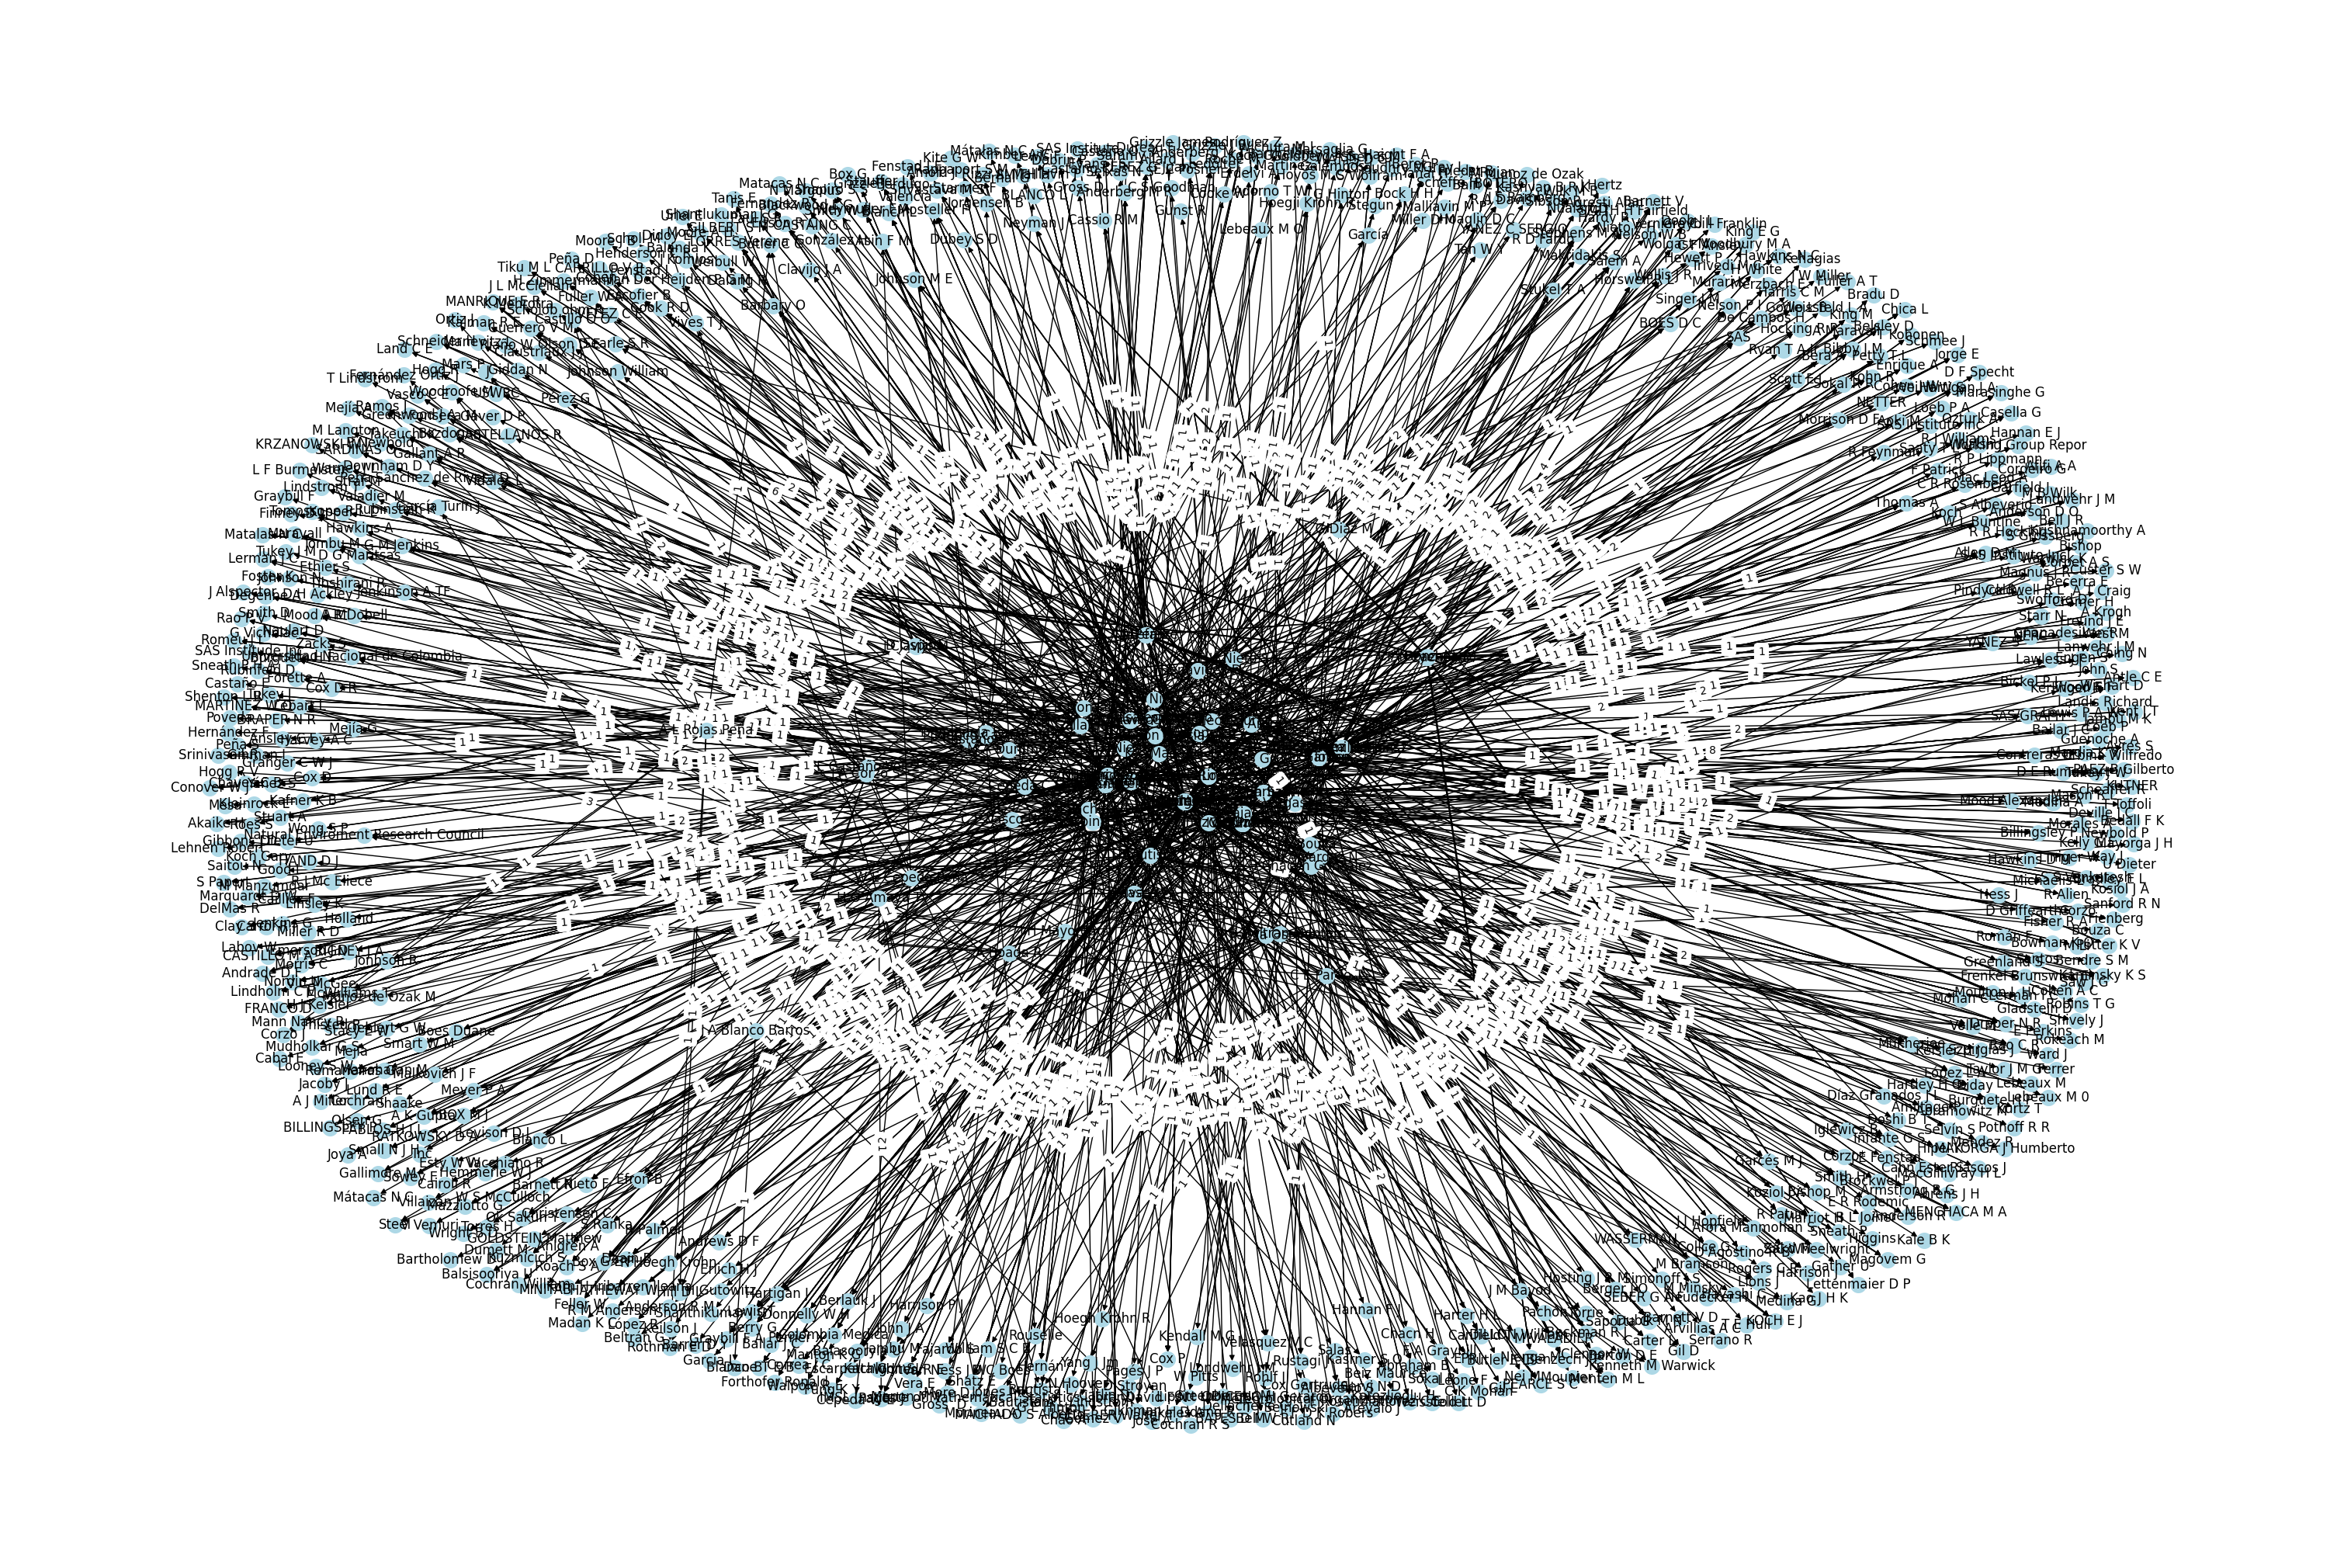

In [151]:
plt.figure(figsize=(30,20))

# Dibujar el grafo
pos = nx.spring_layout(G_90)
nx.draw(G_90, pos, with_labels=True, node_color='lightblue', node_size=200)
labels = nx.get_edge_attributes(G_90, 'weight')
nx.draw_networkx_edge_labels(G_90, pos, edge_labels=labels)

# Mostrar el grafo
plt.show()

In [160]:
print("El número de nodos para las redes de referencias entre autores son:")
print("60s:",G_60.number_of_nodes())
print("70s:",G_70.number_of_nodes())
print("80s:",G_80.number_of_nodes())
print("90s:",G_90.number_of_nodes())

El número de nodos para las redes de referencias entre autores son:
60s: 11
70s: 8
80s: 568
90s: 811


In [161]:
print("El número de enlaces para las redes de referencias entre autores son:")
print("60s:",G_60.number_of_edges())
print("70s:",G_70.number_of_edges())
print("80s:",G_80.number_of_edges())
print("90s:",G_90.number_of_edges())

El número de enlaces para las redes de referencias entre autores son:
60s: 9
70s: 6
80s: 723
90s: 1480


In [163]:
G_60_art = nx.DiGraph()
G_70_art = nx.DiGraph()
G_80_art = nx.DiGraph()
G_90_art = nx.DiGraph()

for index, row in Info[Info['Decada']=='60s'].iterrows():
    G_60_art.add_edge(row['Titulo_Art'], row['Titulo_Ref'])

for index, row in Info[Info['Decada']=='70s'].iterrows():
    G_70_art.add_edge(row['Autor_Art'], row['Autor_Ref'])

for index, row in Info[Info['Decada']=='80s'].iterrows():
    G_80_art.add_edge(row['Autor_Art'], row['Autor_Ref'])

for index, row in Info[Info['Decada']=='90s'].iterrows():
    G_90_art.add_edge(row['Autor_Art'], row['Autor_Ref'])

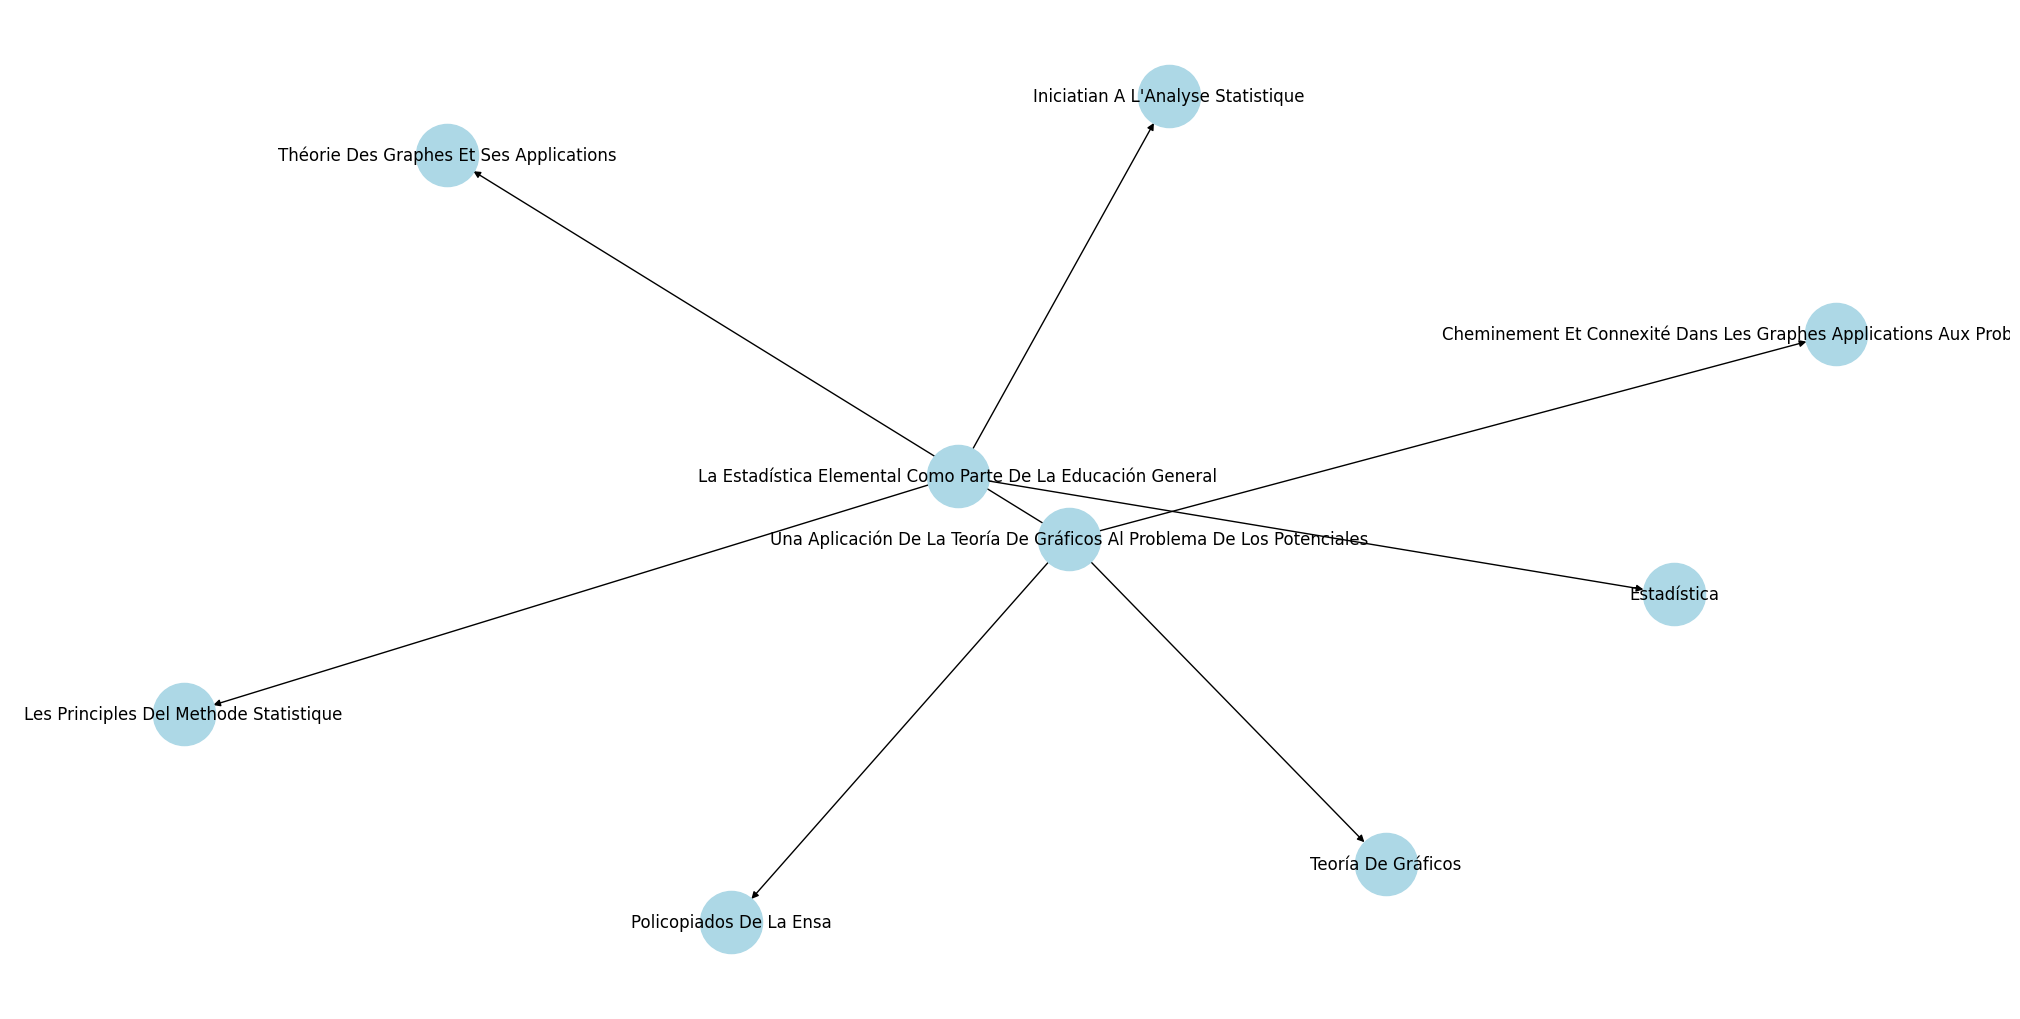

In [166]:
plt.figure(figsize=(20,10))

# Dibujar el grafo
pos = nx.spring_layout(G_60_art)
nx.draw(G_60_art, pos, with_labels=True, node_color='lightblue', node_size=2000)

# Mostrar el grafo
plt.show()

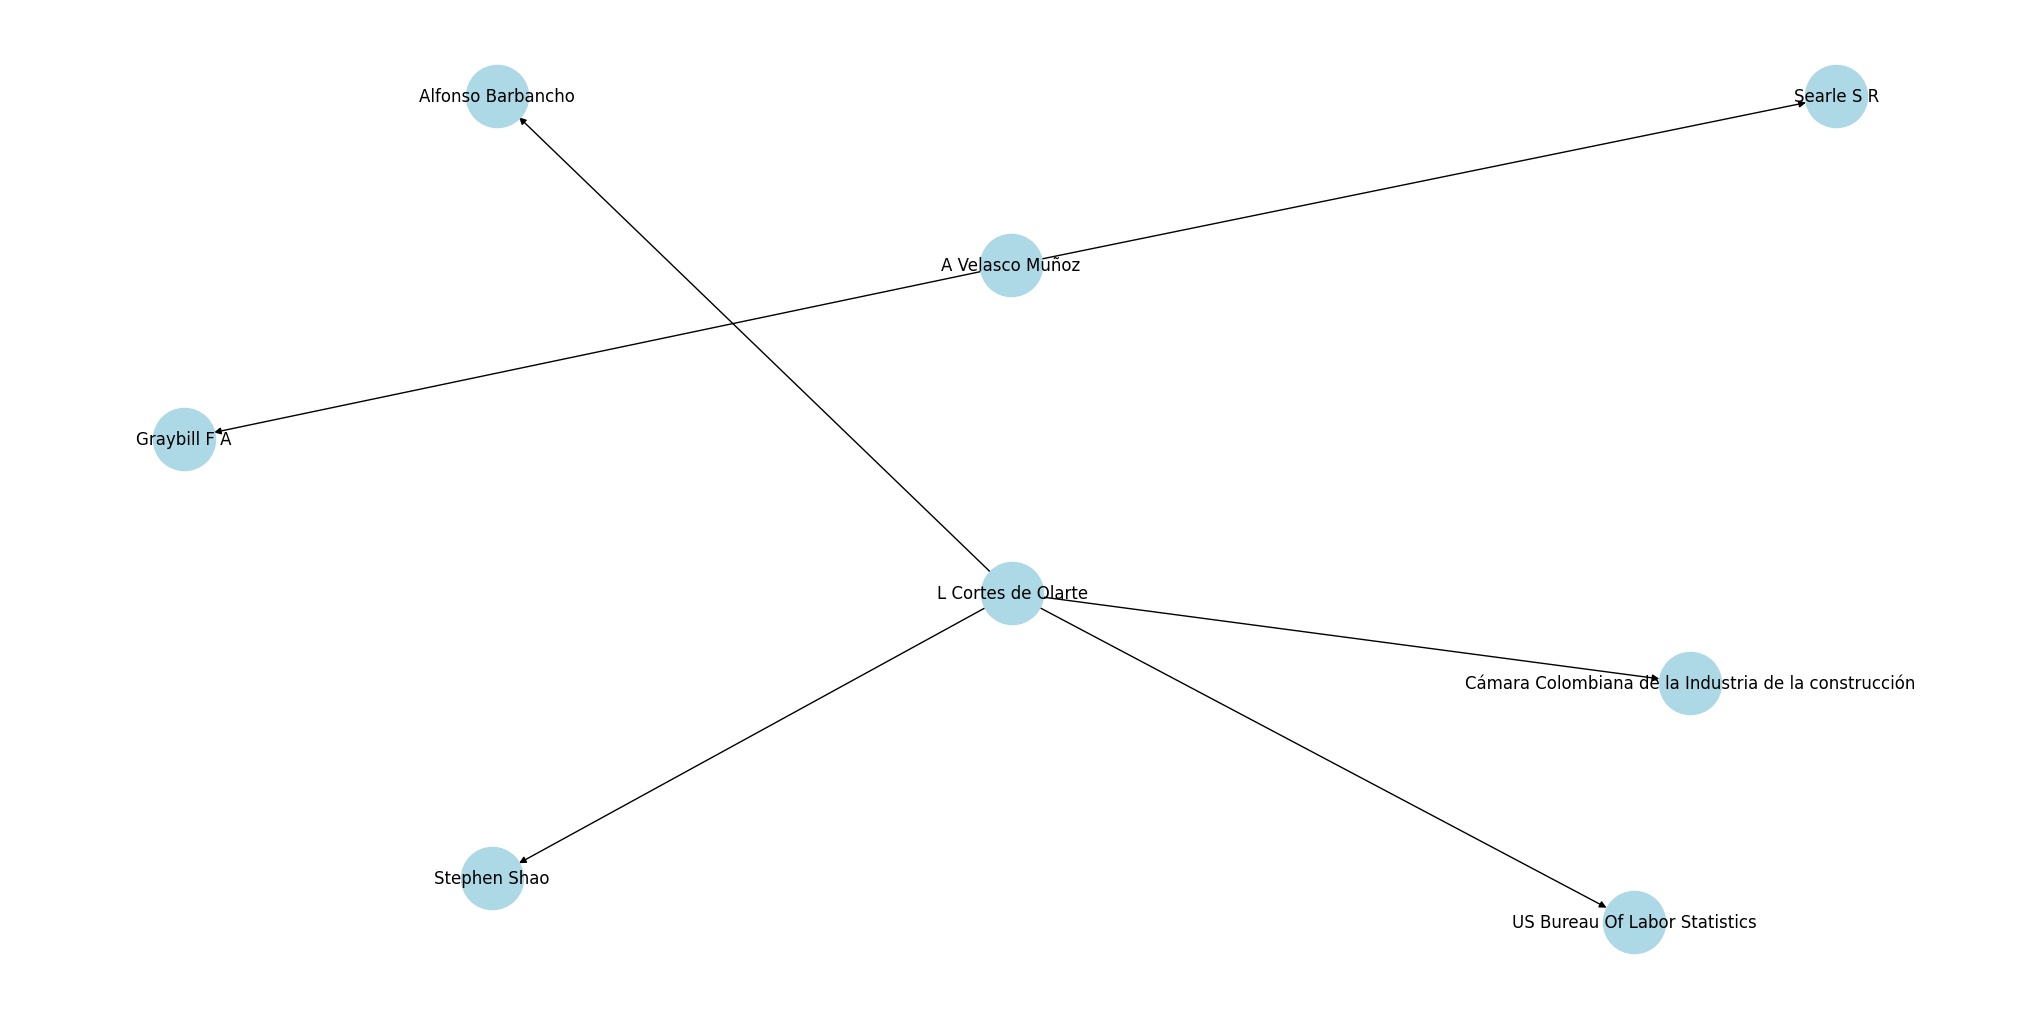

In [167]:
plt.figure(figsize=(20,10))

# Dibujar el grafo
pos = nx.spring_layout(G_70_art)
nx.draw(G_70_art, pos, with_labels=True, node_color='lightblue', node_size=2000)

# Mostrar el grafo
plt.show()

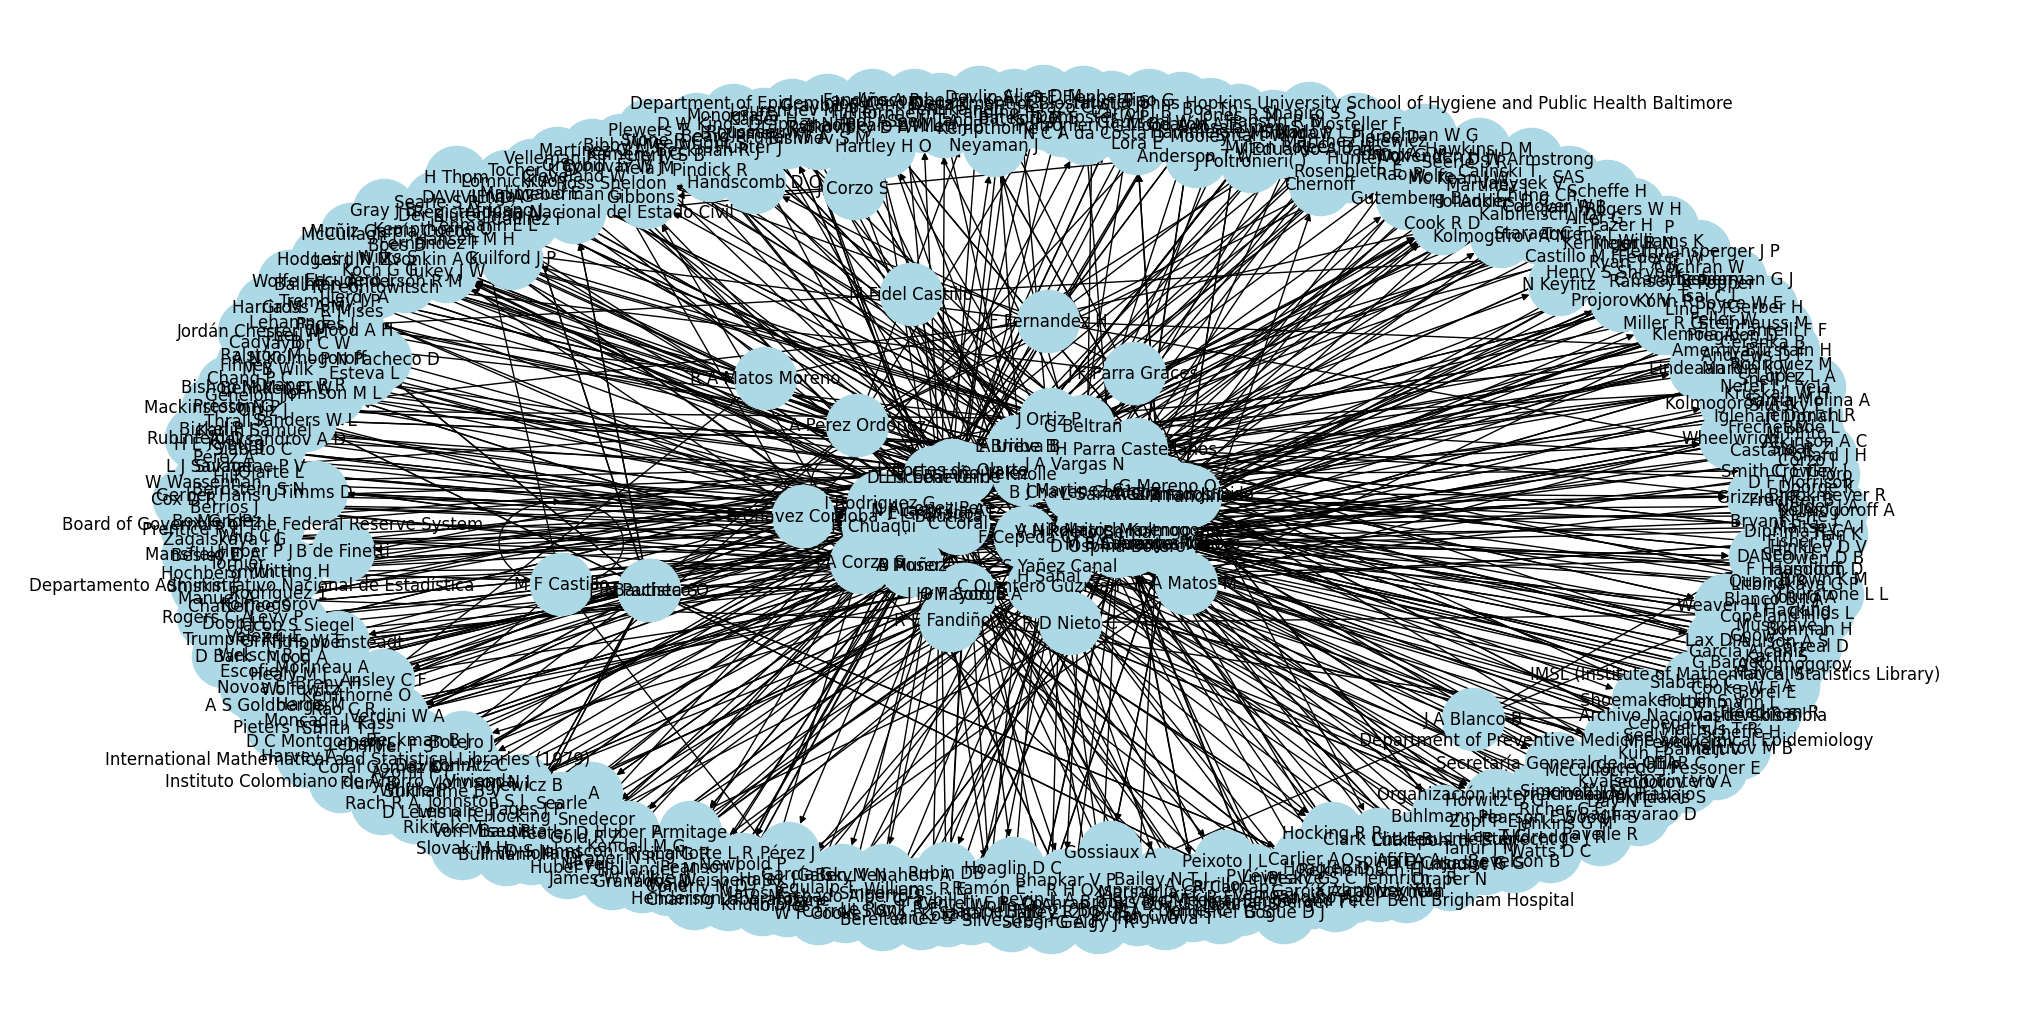

In [168]:
plt.figure(figsize=(20,10))

# Dibujar el grafo
pos = nx.spring_layout(G_80_art)
nx.draw(G_80_art, pos, with_labels=True, node_color='lightblue', node_size=2000)

# Mostrar el grafo
plt.show()